In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df_final = pd.read_csv('https://raw.githubusercontent.com/deforestation-dashboard/build_deforestationDash_DS1/master/deforestation_dataset_final_V4.csv')

df_final.shape
df_final['forest_propotion_to_land'] = df_final['forest_area_km']/df_final['country_land_area_km']
df_final['forest_propotion_to_land'] = df_final['forest_propotion_to_land'].fillna(method='ffill')

df_final = df_final.pivot_table(values=['forest_area_km', 'country_land_area_km',
                                       'forest_propotion_to_land','country_population',
                                       'wood_removal', 'total_land_usage','carbon_emission', 'mean_yearly_exposure_pollution'],
                               index='year',
                               columns=['country'])

#df_final = df_final.stack(level='country')
df_final.head(35)


carbon_emission                                       \
country     Afghanistan  Albania   Algeria Andorra    Angola   
year                                                           
1990                NaN      NaN       NaN     NaN       NaN   
1991                NaN      NaN       NaN     NaN       NaN   
1992                NaN      NaN       NaN     NaN       NaN   
1993                NaN      NaN       NaN     NaN       NaN   
1994                NaN      NaN       NaN     NaN       NaN   
1995             621.55  1043.85  47648.70  215.80   5487.95   
1996                NaN      NaN       NaN     NaN       NaN   
1997                NaN      NaN       NaN     NaN       NaN   
1998                NaN      NaN       NaN     NaN       NaN   
1999                NaN      NaN       NaN     NaN       NaN   
2000                NaN      NaN       NaN     NaN       NaN   
2001                NaN      NaN       NaN     NaN       NaN   
2002                NaN      NaN       NaN     NaN       NaN   
2003                NaN      NaN       NaN     NaN       NaN   
2004                NaN      NaN       NaN     NaN       NaN   
2005             663.50  2127.70  53640.65  291.70   9578.60   
2006                NaN      NaN       NaN     NaN       NaN   
2007                NaN      NaN       NaN     NaN       NaN   
2008                NaN      NaN       NaN     NaN       NaN   
2009                NaN      NaN       NaN     NaN       NaN   
2010            4231.65  2299.80  59590.65  261.60  14529.20   
2011                NaN      NaN       NaN     NaN       NaN   
2012            5377.70  2455.85  64995.75  247.10  16700.25   
2013            5007.65  2532.90  67234.25  241.65  16309.70   
2014            4904.65  2859.50  72701.85  234.20  17382.20   
2015                NaN      NaN       NaN     NaN       NaN   

                                                                     \
country Antigua and Barbuda  Argentina  Armenia    Aruba  Australia   
year                                                                  
1990                    NaN        NaN      NaN      NaN        NaN   
1991                    NaN        NaN      NaN      NaN        NaN   
1992                    NaN        NaN      NaN      NaN        NaN   
1993                    NaN        NaN      NaN      NaN        NaN   
1994                    NaN        NaN      NaN      NaN        NaN   
1995                 139.50   63983.85  1705.55   844.40  140937.75   
1996                    NaN        NaN      NaN      NaN        NaN   
1997                    NaN        NaN      NaN      NaN        NaN   
1998                    NaN        NaN      NaN      NaN        NaN   
1999                    NaN        NaN      NaN      NaN        NaN   
2000                    NaN        NaN      NaN      NaN        NaN   
2001                    NaN        NaN      NaN      NaN        NaN   
2002                    NaN        NaN      NaN      NaN        NaN   
2003                    NaN        NaN      NaN      NaN        NaN   
2004                    NaN        NaN      NaN      NaN        NaN   
2005                 217.05   81057.60  2177.20  1373.95  175095.10   
2006                    NaN        NaN      NaN      NaN        NaN   
2007                    NaN        NaN      NaN      NaN        NaN   
2008                    NaN        NaN      NaN      NaN        NaN   
2009                    NaN        NaN      NaN      NaN        NaN   
2010                 265.00   93961.75  2109.20  1266.35  195439.80   
2011                    NaN        NaN      NaN      NaN        NaN   
2012                 264.95   96180.30  2848.45   681.10  194071.45   
2013                 264.90   94928.25  2749.40   435.20  186141.50   
2014                 268.90  102014.85  2765.90   440.70  180638.65   
2015                    NaN        NaN      NaN      NaN        NaN   

           ...       wood_removal                                       \
country    ...   

In [4]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [5]:
df_final.index = pd.to_datetime(df_final.index, format='%Y')

mod = sm.tsa.statespace.SARIMAX(df_final['forest_propotion_to_land']['United States'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

start_params = [0, 0, 1.]
results = mod.fit()

print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8465      0.077    -10.973      0.000      -0.998      -0.695
ma.L1          0.9298      0.060     15.534      0.000       0.812       1.047
ar.S.L1       -0.0986      0.274     -0.360      0.719      -0.635       0.438
sigma2      6.364e-08    1.6e-08      3.974      0.000    3.23e-08     9.5e-08


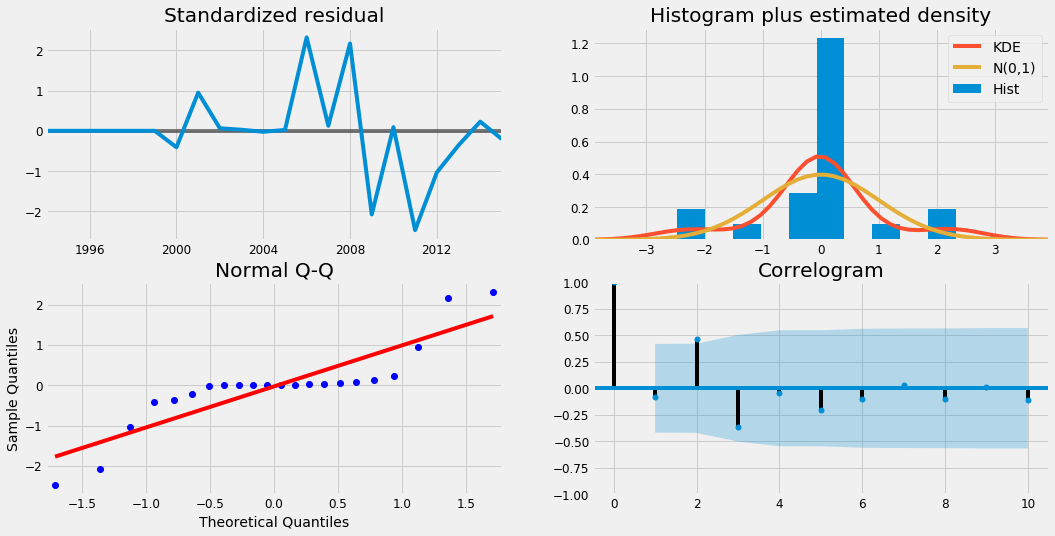

In [6]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

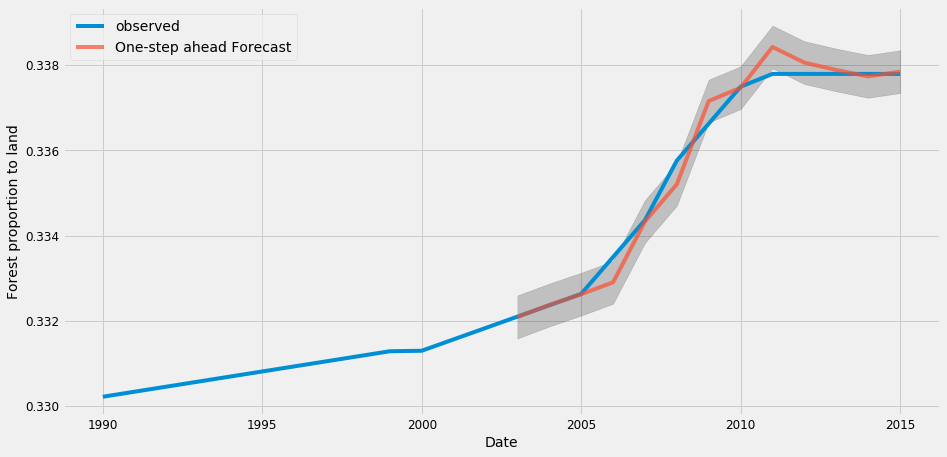

In [7]:
pred = results.get_prediction(start=pd.to_datetime('2003-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df_final['forest_propotion_to_land']['United States']["1990-01-01":"2021-01-01"].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Forest proportion to land')
plt.legend()

plt.show()
plt.close()

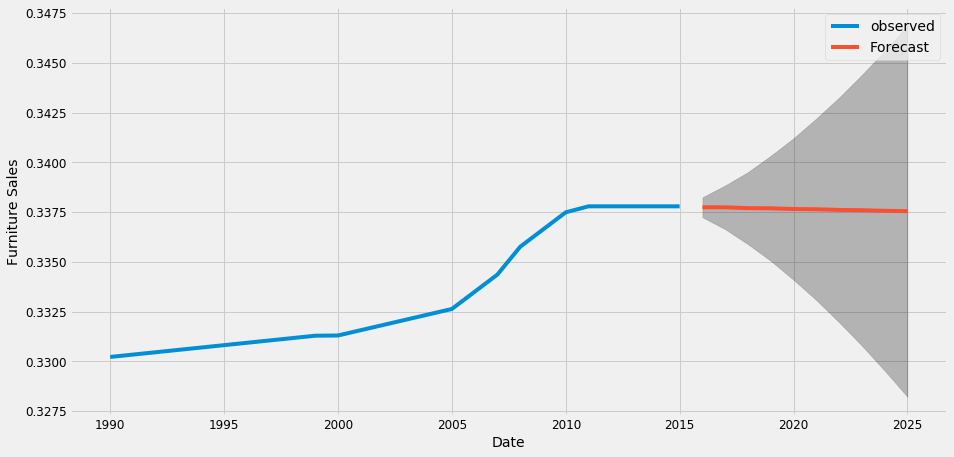

In [8]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = df_final['forest_propotion_to_land']['United States']["1990-01-01":"2021-01-01"].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [9]:
pred_uc.predicted_mean

2016-01-01    0.337747
2017-01-01    0.337745
2018-01-01    0.337704
2019-01-01    0.337695
2020-01-01    0.337659
2021-01-01    0.337646
2022-01-01    0.337614
2023-01-01    0.337598
2024-01-01    0.337568
2025-01-01    0.337551
Freq: AS-JAN, dtype: float64

In [10]:
df_final.total_land_usage

country,Brazil,Canada,China,India,Russia,United States
year,,,,,,
1990-01-01,243324544.0,67951358.0,660776686.0,178497288.0,232599990.0,433208502.0
1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
### carbon_emission
### country_land_area_km - km^2
### country_population - people
### forest_area_km - km^2
### forest_proportion_to_land - % forest/land
### mean_yearly_exposure_pollution - μg/m^3
### total_land_usage - km^2
### wood_removal - m^3

###  Charts in (X,Y) format(Time, wood_removal), (Time, forest_area_km), (forest_area_km, wood_removal)
